In [48]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [49]:
#input 
kepadatan = ctrl.Antecedent(np.arange(0, 101, 1), 'kepadatan')
waktu = ctrl.Antecedent(np.arange(0, 25, 1), 'waktu')

In [50]:
#output
durasi_lampu_hijau = ctrl.Consequent(np.arange(0, 121, 1), 'durasi_lampu_hijau')

In [51]:
kepadatan['tidak_padat'] = fuzz.trimf(kepadatan.universe, [0, 0, 30])
kepadatan['kurang_padat'] = fuzz.trimf(kepadatan.universe, [20, 30, 50])
kepadatan['cukup_padat'] = fuzz.trimf(kepadatan.universe, [40, 50, 70])
kepadatan['padat'] = fuzz.trimf(kepadatan.universe, [60, 70, 90])
kepadatan['sangat_padat'] = fuzz.trimf(kepadatan.universe, [80, 100, 100])

In [52]:
waktu['pagi'] = fuzz.trimf(waktu.universe, [0, 0, 8])
waktu['siang'] = fuzz.trimf(waktu.universe, [7, 12, 17])
waktu['malam'] = fuzz.trimf(waktu.universe, [16, 24, 24])

In [53]:
durasi_lampu_hijau['pendek'] = fuzz.trimf(durasi_lampu_hijau.universe, [0, 0, 30])
durasi_lampu_hijau['sedang'] = fuzz.trimf(durasi_lampu_hijau.universe, [20, 50, 80])
durasi_lampu_hijau['panjang'] = fuzz.trimf(durasi_lampu_hijau.universe, [60, 120, 120])

In [54]:
# Semua kombinasi kepadatan dengan waktu 'pagi'
rule_pagi_tidak_padat = ctrl.Rule(
    kepadatan['tidak_padat'] & waktu['pagi'], durasi_lampu_hijau['pendek'])
rule_pagi_kurang_padat = ctrl.Rule(
    kepadatan['kurang_padat'] & waktu['pagi'], durasi_lampu_hijau['sedang'])
rule_pagi_cukup_padat = ctrl.Rule(
    kepadatan['cukup_padat'] & waktu['pagi'], durasi_lampu_hijau['sedang'])
rule_pagi_padat = ctrl.Rule(
    kepadatan['padat'] & waktu['pagi'], durasi_lampu_hijau['panjang'])
rule_pagi_sangat_padat = ctrl.Rule(
    kepadatan['sangat_padat'] & waktu['pagi'], durasi_lampu_hijau['panjang'])

# Semua kombinasi kepadatan dengan waktu 'siang'
rule_siang_tidak_padat = ctrl.Rule(
    kepadatan['tidak_padat'] & waktu['siang'], durasi_lampu_hijau['pendek'])
rule_siang_kurang_padat = ctrl.Rule(
    kepadatan['kurang_padat'] & waktu['siang'], durasi_lampu_hijau['sedang'])
rule_siang_cukup_padat = ctrl.Rule(
    kepadatan['cukup_padat'] & waktu['siang'], durasi_lampu_hijau['panjang'])
rule_siang_padat = ctrl.Rule(
    kepadatan['padat'] & waktu['siang'], durasi_lampu_hijau['panjang'])
rule_siang_sangat_padat = ctrl.Rule(
    kepadatan['sangat_padat'] & waktu['siang'], durasi_lampu_hijau['panjang'])

# Semua kombinasi kepadatan dengan waktu 'malam'
rule_malam_tidak_padat = ctrl.Rule(
    kepadatan['tidak_padat'] & waktu['malam'], durasi_lampu_hijau['pendek'])
rule_malam_kurang_padat = ctrl.Rule(
    kepadatan['kurang_padat'] & waktu['malam'], durasi_lampu_hijau['pendek'])
rule_malam_cukup_padat = ctrl.Rule(
    kepadatan['cukup_padat'] & waktu['malam'], durasi_lampu_hijau['sedang'])
rule_malam_padat = ctrl.Rule(
    kepadatan['padat'] & waktu['malam'], durasi_lampu_hijau['sedang'])
rule_malam_sangat_padat = ctrl.Rule(
    kepadatan['sangat_padat'] & waktu['malam'], durasi_lampu_hijau['panjang'])


all_rules = [rule_pagi_tidak_padat, rule_pagi_kurang_padat, rule_pagi_cukup_padat, rule_pagi_padat, rule_pagi_sangat_padat,
             rule_siang_tidak_padat, rule_siang_kurang_padat, rule_siang_cukup_padat, rule_siang_padat, rule_siang_sangat_padat,
             rule_malam_tidak_padat, rule_malam_kurang_padat, rule_malam_cukup_padat, rule_malam_padat, rule_malam_sangat_padat]

In [55]:
control_lampu = ctrl.ControlSystem(all_rules)
simulasi_lampu = ctrl.ControlSystemSimulation(control_lampu)

Input  = Kepadatan: 88, Waktu: 2
Output = Durasi Lampu Hijau: 96 detik


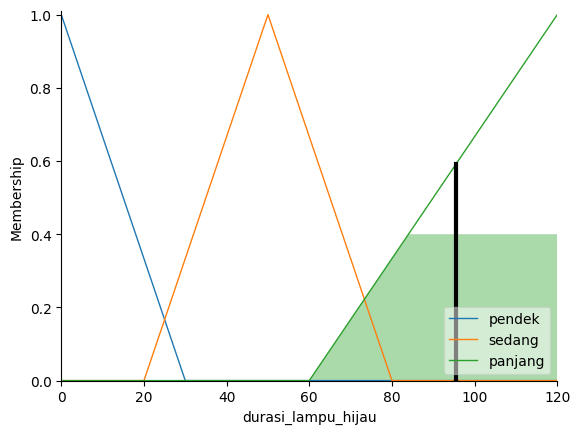

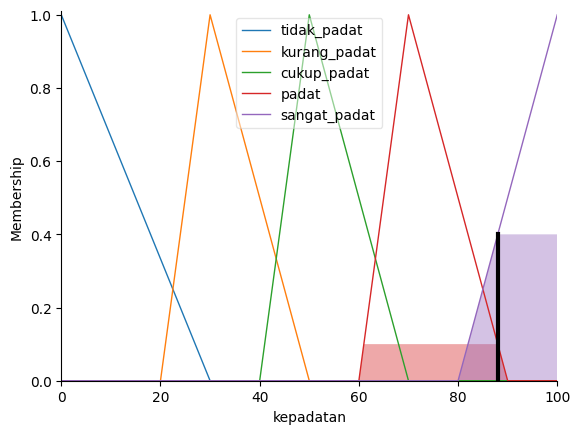

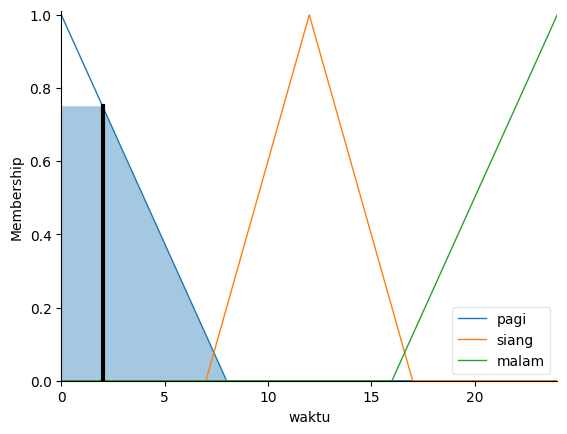

In [56]:
rand_kepadatan = np.random.randint(0,101)
rand_waktu = (np.random.randint(0,25))

simulasi_lampu.input['kepadatan'] = rand_kepadatan

simulasi_lampu.input['waktu'] = rand_waktu


simulasi_lampu.compute()


# Output
print(f"Input  = Kepadatan: {rand_kepadatan}, Waktu: {rand_waktu}")
print(f"Output = Durasi Lampu Hijau: {simulasi_lampu.output['durasi_lampu_hijau']:.0f} detik")

durasi_lampu_hijau.view(sim=simulasi_lampu)
kepadatan.view(sim=simulasi_lampu)
waktu.view(sim=simulasi_lampu)